# Assignment 1: Approximation of mathematical functions

## Working on the assignment, todo and not todo:
<b><u>Todo</u></b>:<br />
<div class="alert alert-success">
<ul><li>&#x2714; <b> Work by yourself</b> and submit your own assignment, <b>no pairing</b> to other students</li>
<li>&#x2714; Test and save your assignment - <b>submit the last tested and saved version</b></li>
<li>&#x2714; to <b>submit</b> the assignment, download the notebook (File → Download .ipynb in Google Colab)</li>
<li>&#x2714; submit <b>only</b> the <b>ipynb</b> file under the name <b>hw1.ipynb</b></li>
<li>&#x2714; It is advisable to add extra cells to check your code implementation</li></ul>
</div>
<b><u>Not todo</u></b>:<br />
<div class="alert alert-danger">
<ul><li>&#x2718; do <b>NOT</b> submit an <b>empty assignment</b></li>
<li>&#x2718; do <b>NOT submit extra files</b>, <u>unless you're asked to do so</u></li>
<li>&#x2718; <b>Do NOT submit a .py/.txt/.rar/.zip (or any non (.ipynb) file)</b> <u>version for the notebook</u> of the assignment</li>
<li>&#x2718; <b>do NOT change</b> the notebook file name</li></ul>
</div>

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Approximating cosine function

Function $\cos$ is defined on positive real numbers: $\cos(x): \mathcal{R} \rightarrow [-1, 1]$. The Taylor series for $\cos$ has [the following form](https://en.wikipedia.org/wiki/Sine_and_cosine):

\begin{align}\cos (x)  &= 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots \\
&= \sum_{n=0}^\infty (-1)^{n}\frac{x^{2n}}{2n!}
\end{align}



1. Implement `cos1` that approximates $\cos(x)$



In [2]:
def cos1(x, n):
    """Computes cos(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    fact = 1
    val = 1
    xi = 1
    sign = 1
    for i in range(1, n+1):
      fact *= (2*i - 1)*(2*i)  
      xi *= x*x
      sign = -sign
      val += sign*xi/fact
    return val

 2. Plot  `np.cos` and `cos1` for $-10 ≤ x ≤ 10$ for $n=1,2,4,8$.   
    

   


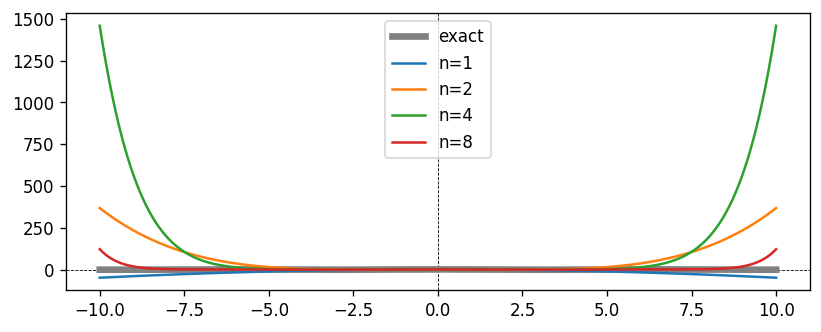

In [3]:
def plot_fun(f, g, min=-5, max=5, logn_from=0, logn_till=4):
  """Plots approximate function f with a finite number of terms of Taylor
  series, and accurate function g for a range of arguments between min and max.
  f is plotted for numbers of Taylor series terms ranging exponentially from
  2**logn_from to 2**(logn_till-1), inclusive.
  Arguments:
     f - approximate function f(x, n) computing the value at x using n terms
        of Taylor series.
     g - accurate (practically exact) function g(x).
     min - minimum value of the range of arguments.
     max - maximum value of the range of arguments.
     logn_from - the smallest number of Taylor series terms is 2**logn_from.
     logn_till - the largets number of Taylor series terms is 2**(logn_till-1).
  """
  # Create a vector of 10000 values equally spaced between min and max.
  x=np.linspace(min, max, 10000)
  # Prepare a canvas for the graph.
  plt.figure(figsize=(8, 3)).set_dpi(120)
  # Plot axes x=0 and y=0, dashed.
  plt.axhline(0, ls='--', c='black', lw=0.5)
  plt.axvline(0, ls='--', c='black', lw=0.5)
  # Plot the 'exact' function.
  plt.plot(x, g(x), label="exact", c='gray', lw=4)
  # For each number of Taylor series terms ...
  for logn in range(logn_from, logn_till):
      n = 2**logn
      y = [f(x_, n) for x_ in x]
      # Plot the Taylor approximation
      plt.plot(x, y, label=f"n={n}")
  # Display the legend
  plt.legend()

plot_fun(cos1, np.cos, min=-10, max=10)

3. Implement `cos2` that approximates $\cos(x),\,-\infty < x < \infty$ in a more efficient way. _Hint:_ $\cos (x + \pi) = - \cos(x)$.


In [18]:
from numpy import floor
pi = 3.141592653589793

def cos2(x, n):
  sign = 1
  
  k = int(x/pi)
  x -= k*pi
  if k % 2 == 1:
    sign = -sign
  return sign*cos1(x, n)


 4. Plot  `np.cos` and `cos2` for $-10 ≤ x ≤ 10$ for $n=1,2,4,8$.   
    



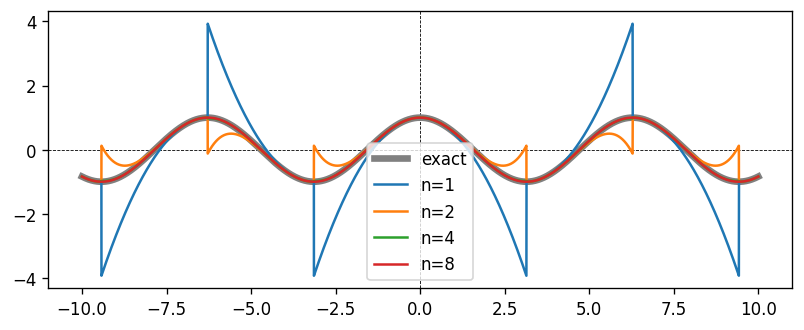

In [19]:
plot_fun(cos2, np.cos, min=-10, max=10)

5.
* What are the maximum absolute and relative errors of `cos1` compared to `cos2` on the set of points $x \in [0, 1, 2, 3]$? 
* What are the maximum absolute and relative errors of `cos1` compared to `cos2` on the set of points $x \in [4, 5, 6, 7]$? 

Use $n=8$ for both cases

In [20]:
def calculate_error(start, end):
  n = 2**3

  abs1, abs2 = 0, 0
  relative1, relative2 = 0, 0
  for x in range(start, end + 1):
    me = np.cos(x)
    e = cos1(x, n)
    e2 = cos2(x, n)
    
    abs1 = max(abs1, abs(me - e))
    abs2 = max(abs2, abs(me - e2))

    relative1 = max(relative1, abs(abs1/me))
    relative2 = max(relative2, abs(abs2/me))

  print("for x in range "+str(start)+"-"+str(end))
  print("max absolute: cos1:" + str(abs1) +"\tcos2: "+str(abs2))
  print("max relative: cos1:" + str(relative1)+"\tcos2: "+str(relative2)+"\n")

calculate_error(0,3)
calculate_error(4,7)

for x in range 0-3
max absolute: cos1:5.910629896632713e-08	cos2: 5.910629896632713e-08
max relative: cos1:5.970378479563573e-08	cos2: 5.970378479563573e-08

for x in range 4-7
max absolute: cos1:0.22473969129055693	cos2: 2.480959382378245e-08
max relative: cos1:0.2981018958304072	cos2: 3.290823668566045e-08



## Question 2: Using approximate versions of  $\log$ and $\exp$

1. Use `exp2`  from [lecture 1 notebook](https://colab.research.google.com/drive/1-UKYN6p63tcqhPUg2TAUMsaJz0hUv1x0?usp=sharing) and `cos2` from Q1 to implement the function:
 $f(x)=cos(e^{x})$ 
 and implement the same function with `math.exp` and `np.cos`.



In [21]:
#exp1
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result
exp(2,50)

#exp2 
def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
                   # of the fractional part
  return v

def my_function(x, n):
  return cos2(exp2(x, n), n)

def built_in_function(x):
  return np.cos(np.exp(x))


2. Compare both implemetations in term of <br><b>absolute error</b>.
Check the cases which $x \in [10, 50, 100, 200]$. Use $ n = 8$


In [25]:
def calculate_error2(x, n):
  return abs(my_function(x, n) - built_in_function(x))

n = 8
numbers = [10, 50, 100, 200]

for i in numbers:
  print("x:"+str(i)+"\tabsolute error: "+str(calculate_error2(i,n)))

x:10	absolute error: 1.0035083874981865e-11
x:50	absolute error: 0.11792433868142338
x:100	absolute error: 1.0422986151490803
x:200	absolute error: 0.5593110114643116


3. Compare both implemetations in term of <br><b>relative error</b>.
Check the cases which $x \in [10, 50, 100, 200]$. Use $ n = 8$


In [24]:
def calculate_error3(x, n):
  a = my_function(x, n)
  b = built_in_function(x)
  return abs(a - b)/b

n = 8
numbers = [10, 50, 100, 200]

for i in numbers:
  print("x:"+str(i)+"\trelative error: "+str(calculate_error3(i,n)))

x:10	relative error: -1.3840687123849758e-11
x:50	relative error: 0.13368959586204135
x:100	relative error: -24.64143593059789
x:200	relative error: 1.2691740116374994


4. Lets define a "special" number to be an natural number $x\in \mathbb{N}$ such that $f(x) > 0$. (the function from Q2.1)
find 3 "special" numbers, x, that using the approximated $f(x)$, with `exp2` and `cos2`, it is holds that $f_{approx}(x) \leq 0$.
Use $n = 8$.


In [26]:
n = 8
x = 0
counter = 0

while counter < 1:
  if built_in_function(x) > 0 and my_function(x, n) <= 0:
    print("special number #"+str(counter + 1)+": "+str(x))
    counter += 1
  x += 1

special number #1: 37


5. For which $n$ (number of Taylor series elements) the absolute difference between the <br><b>relative errors</b> of $f(10)$ computed for `n` and `n+1` and `n+1` and `n+2`  is smaller than $10^{-8}$ ? 

In [27]:
n = 0
found = False

while not found:
  n += 1
  answer1 = abs(calculate_error3(10, n) - calculate_error3(10, n+1))
  if(answer1 < 10**-8):
    answer2 = abs(calculate_error3(10, n+1) - calculate_error3(10, n+2))
    if(answer2 < 10**-8):
      found = True  
  
print("answer: "+str(n))
  



answer: 5
